In [1]:
# Import necessary libraries
import yfinance as yf
import streamlit as st
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import mplfinance as mpf


In [2]:
# # Define ticker symbol
# Bitcoin = 'BTC-USD'
# Ethereum = 'ETH-USD'
# Litecoin = 'LTC-USD'
# Ripple = 'XRP-USD'
# Dogecoin = 'DOGE-USD'
# Cardano = 'ADA-USD'
# Polkadot = 'DOT1-USD'
# Chainlink = 'LINK-USD'
# Stellar = 'XLM-USD'
# VeChain = 'VET-USD'
# Tether = 'USDT-USD'
# Bitcoin_Cash = 'BCH-USD'

In [3]:
# define start date 
start_date = "2014-01-01"

# define end date
end_date = "2024-12-31"

In [4]:
# # Access the data
# ticker = yf.Ticker(Bitcoin)
# ticker1 = yf.Ticker(Ethereum)
# ticker2 = yf.Ticker(Litecoin)
# ticker3 = yf.Ticker(Ripple)
# ticker4 = yf.Ticker(Dogecoin)
# ticker5 = yf.Ticker(Cardano)
# ticker6 = yf.Ticker(Polkadot)
# ticker7 = yf.Ticker(Chainlink)
# ticker8 = yf.Ticker(Stellar)
# ticker9 = yf.Ticker(VeChain)
# ticker10 = yf.Ticker(Tether)
# ticker11 = yf.Ticker(Bitcoin_Cash)

In [5]:
# # Get historical market data
# hist = ticker.history(period="max")
# hist1 = ticker1.history(period="max")
# hist2 = ticker2.history(period="max")
# hist3 = ticker3.history(period="max")
# hist4 = ticker4.history(period="max")
# hist5 = ticker5.history(period="max")
# hist6 = ticker6.history(period="max")
# hist7 = ticker7.history(period="max")
# hist8 = ticker8.history(period="max")
# hist9 = ticker9.history(period="max")
# hist10 = ticker10.history(period="max")
# hist11 = ticker11.history(period="max")

In [6]:
# # create a function that fetches historical crypto price for given ticker symbol and date 
# def get_crypto_price_history(ticker,start_date,end_date):
#     """
#     fetches historical crypto data for a given crypto symbol and date
#     args: 
#         ticker: crypto ticker symbol
#         start date: the start is in "YYYY-MM-DD" format
#         end date: the end date is in "YYYY-MM-DD" format
    
#     returns: 
#         dataframe containing historical crypto price
    
#     """
#     # create a ticker object for the given ticker symbol
#     crypto=yf.Ticker(ticker)
#     # fetch historical data for the especified date range
#     history = crypto.history(start=start_date,end=end_date)
#     return history

In [7]:
# # reading bitcoin 
# bitcoin_data = get_crypto_price_history(Bitcoin,start_date,end_date)
# # bitcoin_data

# #reading ethereum
# Ethereum_data = get_crypto_price_history(Ethereum,start_date,end_date)

# # reading litecoin
# # Litecoin = 'LTC-USD'
# # Ripple = 'XRP-USD'
# # Dogecoin = 'DOGE-USD'
# # Cardano = 'ADA-USD'
# # Polkadot = 'DOT1-USD'
# # Chainlink = 'LINK-USD'
# # Stellar = 'XLM-USD'
# # VeChain = 'VET-USD'
# # Tether = 'USDT-USD'
# # Bitcoin_Cash = 'BCH-USD'

In [8]:
# User inputs ticker and the function outputs to dataframe
def get_crypto_price_history(start_date,end_date):
    """
    fetches historical crypto data for a given crypto symbol and date
    args: 
        ticker: crypto ticker symbol
        start date: the start is in "YYYY-MM-DD" format
        end date: the end date is in "YYYY-MM-DD" format
    
    returns: 
        dataframe containing historical crypto price
    
    """
    # allow user to input the ticker symbol
    crypto_ticker = input()
    # create a ticker object for the given ticker symbol
    crypto=yf.Ticker(crypto_ticker)
    # fetch historical data for the especified date range
    history = crypto.history(start=start_date,end=end_date)
    return history

In [16]:
data = get_crypto_price_history(start_date,end_date)

In [17]:
data_6_months = data.tail(110)

In [11]:
# Note: Create line plot, candlestick plot, bar plot, and heat map for the data --> after create the streamlit integration 

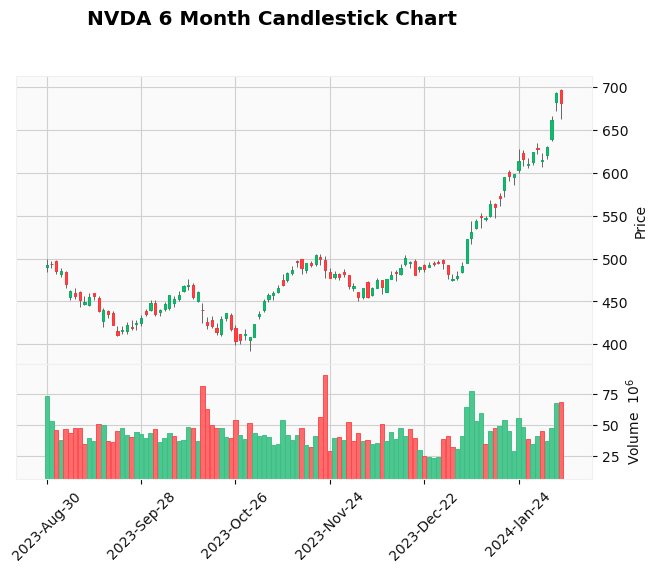

In [19]:
# MPF plot
mpf.plot(data_6_months, type='candle', volume=True, style='yahoo', title='NVDA 6 Month Candlestick Chart')

In [20]:
 def plot_candlestick(data, title):
    """
    This function plots a candlestick chart for the given data
    args:
        data: the dataframe containing historical crypto price
        title: the title of the plot
    """
    # # create a figure and axis
    # fig, ax = plt.subplots()
    # # plot the candlestick chart
    # ax.plot(data.index, data['Close'], label='Close Price')
    # # set the title of the plot
    # ax.set_title(title)
    # # set the x-axis label
    # ax.set_xlabel('Date')
    # # set the y-axis label
    # ax.set_ylabel('Price ($)')
    # # rotate the x-axis labels
    # plt.xticks(rotation=45)
    # # show the legend
    # plt.legend()
    # # display the plot
    # plt.show() 
  # set fig
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        vertical_spacing=0.10, subplot_titles=('Candlestick Chart', 'Volume'),
                        row_width=[0.2, 0.7])
    # Volume
    fig.add_trace(go.Bar(x=data.index, y=data['Volume'], marker_color='lime', showlegend=False), row=2, col=1)

    # Candlestick chart
    fig.add_trace(go.Candlestick(x=data.index,
                                open=data["Open"],
                                high=data["High"],
                                low=data["Low"],
                                close=data["Close"],
                                increasing_line_color= 'green', 
                                decreasing_line_color= 'red',
                                name="OHLC"),
                row=1, col=1)

    fig.update_layout(
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($)',
            titlefont_size=18,
            tickfont_size=12,
            color = 'white'
        ),
        xaxis=dict(
            color = 'white'
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='gainsboro',
        plot_bgcolor = 'black'
    )
    # Remove range slider; (short time frame)
    fig.update(layout_xaxis_rangeslider_visible=False)

    fig.show()
    return fig

In [21]:
plot_candlestick(data_6_months, 'Bitcoin 6 Month Candlestick Chart');